In [1]:
#read in data file disasters.csv
import pandas as pd
import HTMLParser
import numpy as np
import string
import json
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
disasters = pd.read_csv('disasters.csv',header =0)
            
print disasters.info()

disasters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12471 entries, 0 to 12470
Data columns (total 14 columns):
date_started        12471 non-null object
date_ended          12134 non-null object
declaration_type    12471 non-null object
disaster_type       12471 non-null object
disaster_title      12471 non-null object
days_lasted         12134 non-null float64
county              12471 non-null object
county_fip          12429 non-null object
state               12471 non-null object
state_abbr          12471 non-null object
division_name       12471 non-null object
region_name         12471 non-null object
latitude            12471 non-null float64
longitude           12471 non-null float64
dtypes: float64(3), object(11)
memory usage: 1.3+ MB
None


,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
0,1965-04-14,1965-04-14,Major Disaster Declaration,Tornado,Tornadoes & Severe Storms,0.0,Howard County,IN-067,Indiana,IN,East North Central,Midwest,40.448277,-86.134470
1,1965-04-14,1965-04-14,Major Disaster Declaration,Tornado,Tornadoes & Severe Storms,0.0,Grant County,IN-053,Indiana,IN,East North Central,Midwest,40.473060,-85.684578
2,1965-04-14,1965-04-14,Major Disaster Declaration,Tornado,Tornadoes & Severe Storms,0.0,Wells County,IN-179,Indiana,IN,East North Central,Midwest,40.777835,-85.189405
3,1965-04-14,1965-04-14,Major Disaster Declaration,Tornado,Tornadoes & Severe Storms,0.0,Clinton County,IN-023,Indiana,IN,East North Central,Midwest,40.337692,-86.499655
4,1965-04-14,1965-04-14,Major Disaster Declaration,Tornado,Tornadoes & Severe Storms,0.0,Starke County,IN-149,Indiana,IN,East North Central,Midwest,41.271562,-86.620794


In [3]:
import plotly
from plotly.graph_objs import *

plotly.offline.init_notebook_mode(connected=True)

In [4]:
by_state=dict.fromkeys(list(set(disasters['state_abbr'])))
for key in by_state:
    by_state[key]=len(disasters[disasters['state_abbr']==key]) 
sum(by_state[value] for value in by_state)

12471

In [5]:
by_state_df=pd.DataFrame(by_state.items(),columns=['state_abbr','count'])
by_state_df.head()
len(by_state_df)

50

In [6]:
states=dict(set(zip(disasters['state'],disasters['state_abbr'])))

In [7]:
states_df=pd.DataFrame(states.items(),columns=['state','state_abbr'])
states_df.head()
len(states_df)

50

In [8]:
counts_state=pd.merge(by_state_df,states_df,on='state_abbr')
counts_state.head()

,state_abbr,count,state
0,WA,170,Washington
1,DE,20,Delaware
2,WI,120,Wisconsin
3,WV,165,West Virginia
4,HI,31,Hawaii


In [9]:
type(by_state_df['state_abbr'][0])

str

In [10]:
scl = [[0.0, 'rgb(242,240,248)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

counts_state['text'] =counts_state['state'] 

In [11]:
data = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = True,
        locations = counts_state['state_abbr'],
        z = counts_state['count'].astype(float),
        locationmode = 'USA-states',
        text = counts_state['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "times")
        ) ]

layout = dict(
        title = '1965-2013 US Recorded Natural Disasters by State<br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, filename='disaster_by_state' )

In [12]:
type(disasters)
dis = disasters[pd.notnull(disasters['county_fip'])]
#dis.info()

In [13]:
len(set(zip(dis['county'],dis['county_fip'],dis['longitude'],dis['latitude'])))

3101

In [14]:
by_latlon=dict.fromkeys(list(set(zip(dis['county'],dis['county_fip'],dis['longitude'],dis['latitude']))))
for key in by_latlon:
    by_latlon[key]=len(dis[dis['county_fip']==key[1]]) 
#print by_latlon
sum(by_latlon[value] for value in by_latlon)

12429

In [15]:
by_latlon_df=pd.DataFrame(by_latlon.items(),columns=['location','count'])
by_latlon_df['county'],by_latlon_df['fip'],by_latlon_df['lon'],by_latlon_df['lat'] = zip(*by_latlon_df['location'])

del by_latlon_df['location']

print by_latlon_df.head()


by_latlon_df[by_latlon_df['count']==max(by_latlon_df['count'])]#los angeles county

   count            county     fip         lon        lat
0      3     Elbert County  CO-039 -104.193092  39.353700
1      1   Garfield County  NE-071  -98.924534  41.967896
2      7  Limestone County  TX-293  -96.663812  31.546108
3      1     Putnam County  MO-171  -92.977556  40.474490
4      1    Garrard County  KY-079  -84.564147  37.641323


,count,county,fip,lon,lat
2332,40,Los Angeles County,CA-037,-118.24366,34.052227


In [16]:
fips = pd.read_csv('national_county.txt', header=0, dtype=object,
                   names=['state_abbr', 'state_fip', 'county_fip', 'county', 'fip_class_code'])
fips.tail()

,state_abbr,state_fip,county_fip,county,fip_class_code
3229,PR,72,153,Yauco Municipio,H1
3230,UM,74,300,Midway Islands,H4
3231,VI,78,010,St. Croix Island,H4
3232,VI,78,020,St. John Island,H4
3233,VI,78,030,St. Thomas Island,H4


In [17]:
by_latlon_df['fip']=[fips[fips['state_abbr']==f[:2]]['state_fip'].iloc[0]+f[3:] for f in by_latlon_df['fip']]

In [18]:
by_latlon_df.sort_values(by=['count'],ascending=[False])[:5]

,count,county,fip,lon,lat
2332,40,Los Angeles County,06037,-118.243660,34.052227
912,28,Riverside County,06065,-117.396119,33.953297
2572,26,San Bernardino County,06071,-116.419389,34.959208
1989,24,Collier County,12021,-81.427898,26.069985
309,22,Monroe County,12087,-81.782598,24.555700


In [19]:
import csv
from bs4 import BeautifulSoup

In [20]:
# Load the SVG map
svg = open('USA_Counties_with_FIPS_and_names.svg', 'r').read()

In [21]:
# Load into Beautiful Soup
soup = BeautifulSoup(svg, 'xml')

In [22]:
# Find counties
paths = soup.findAll('path')

In [23]:
colors = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']

In [24]:
# County style
path_style ='font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'


In [25]:
min_value=min(by_latlon_df['count'])
max_value=max(by_latlon_df['count'])
print min_value,max_value

1 40


In [27]:
by_latlon_df[by_latlon_df['fip']=='12021']['count'].iloc[0]

24

In [28]:
# Color the counties based on disasters data
for p in paths:
     
    if p['id'] not in ["State_Lines", "separator"]:
        # pass
        try:
            count = by_latlon_df[by_latlon_df['fip']==p['id']]['count'].iloc[0]
        except:
            continue
             
    
        color_class = int(math.ceil(float(len(colors)) * float(count- min_value+1) / float(max_value - min_value+1)-1))
      
 
        color = colors[color_class]
        p['style'] = path_style + color


In [29]:
len(paths)

3143

In [30]:
#paths[3140]

In [36]:
paths=paths[:3141] ## find out an error , get rid of the junk 

In [37]:
new_svg = open('disaster_county.svg', 'w')

In [38]:
new_svg.write(soup.prettify())

In [39]:
from IPython.display import SVG

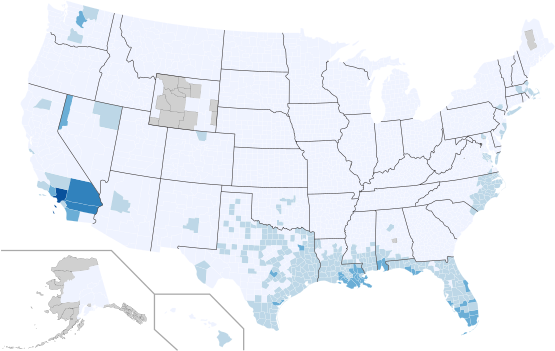

In [40]:
SVG('disaster_county.svg')

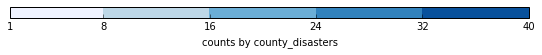

In [72]:
##dont know how to add a colorbar to svg, just incase we need it
fig = plt.figure(figsize=(8, 1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])

cmap = mpl.colors.ListedColormap(['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c'])

bounds = [1, 8, 16, 24, 32,40]
norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,                               
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('counts by county_disasters')
plt.show()

color scheme: http://colorbrewer2.org/?type=sequential&scheme=Blues&n=5

In [21]:
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = by_latlon_df['lon'],
        lat = by_latlon_df['lat'],
        text = [],
        mode = 'markers',
        marker = dict( 
            size = by_latlon_df['count']/2. , 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0,
                color='rgba(102, 102, 102)'
            )
            )
        )]

layout = dict(
        title = '1965-2013 Recorded Natural Disasters in US',
        colorbar = False,   
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 2        
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='disasters_by_latlon' )

In [22]:
ufo_by_latlon_df=pd.read_csv('ufos_by_latlon.csv',header =0)

In [23]:
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = ufo_by_latlon_df['lon'],
        lat = ufo_by_latlon_df['lat'],
        text = [''],
        name = 'ufos',
        mode = 'markers',
        marker = dict( 
            size = ufo_by_latlon_df['count']/10. , 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0,
                color='rgba(102, 102, 102)'
            )
            )
        ),
        dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = by_latlon_df['lon'],
        lat = by_latlon_df['lat'],
        text = [],
        name = 'disasters',
        mode = 'markers',
        marker = dict( 
            size = by_latlon_df['count']/2. , 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0,
                color='rgba(102, 102, 102)'
            )
            )
        )]

layout = dict(
        title = '1965-2013 UFO Sightings vs Disasters in US',
        colorbar = False,   
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 2        
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='ufos_disasters_by_latlon' )

In [109]:
top_states_dis=list(counts_state.sort_values(by=['count'],ascending=[False])[0:5]['state']) 
print top_states_dis#top 5 states with most disasters

['Texas', 'Florida', 'Louisiana', 'North Carolina', 'Virginia']


In [124]:
disasters[disasters['state']==top_states_dis[0]].groupby(['disaster_type']).count().sort_values(by=['state'],ascending=[False])
#Texas top 3 disaster types: hurricane,fire,tornado

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Hurricane,1148,1148,1148,1148,1148,1148,1147,1148,1148,1148,1148,1148,1148
Fire,1115,1084,1115,1115,1084,1115,1115,1115,1115,1115,1115,1115,1115
Tornado,48,48,48,48,48,48,48,48,48,48,48,48,48
Coastal Storm,42,42,42,42,42,42,42,42,42,42,42,42,42


In [125]:
disasters[disasters['state']==top_states_dis[1]].groupby(['disaster_type']).count().sort_values(by=['state'],ascending=[False])
#Florida top 3 disaster types: hurricane,fire,tornado

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Hurricane,571,571,571,571,571,571,571,571,571,571,571,571,571
Fire,251,124,251,251,124,251,251,251,251,251,251,251,251
Tornado,38,38,38,38,38,38,38,38,38,38,38,38,38
Coastal Storm,25,25,25,25,25,25,25,25,25,25,25,25,25


In [126]:
disasters[disasters['state']==top_states_dis[2]].groupby(['disaster_type']).count().sort_values(by=['state'],ascending=[False])
#Louisiana top 3 disaster types: hurricane,coastal storm,tornado

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Hurricane,737,737,737,737,737,737,731,737,737,737,737,737,737
Coastal Storm,35,35,35,35,35,35,35,35,35,35,35,35,35
Tornado,22,22,22,22,22,22,20,22,22,22,22,22,22
Fire,11,11,11,11,11,11,11,11,11,11,11,11,11


In [128]:
disasters[disasters['state']==top_states_dis[3]].groupby(['disaster_type']).count().sort_values(by=['state'],ascending=[False])
#north carolina top 3 disaster types: hurricane,tornado,fire

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Hurricane,652,652,652,652,652,652,651,652,652,652,652,652,652
Tornado,42,42,42,42,42,42,42,42,42,42,42,42,42
Fire,5,0,5,5,0,5,5,5,5,5,5,5,5


In [130]:
disasters[disasters['state']==top_states_dis[4]].groupby(['disaster_type']).count().sort_values(by=['state'],ascending=[False])
#Louisiana top 3 disaster types: hurricane,fire,earthquake

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Hurricane,664,664,664,664,664,664,663,664,664,664,664,664,664
Fire,11,8,11,11,8,11,11,11,11,11,11,11,11
Earthquake,10,10,10,10,10,10,10,10,10,10,10,10,10


In [134]:
disasters.groupby(['division_name']).count().sort_values(by=['state'],ascending=[False])

# top 5 divisons : west south central, south atlantic, east south central, west north central, mountain

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,region_name,latitude,longitude
division_name,,,,,,,,,,,,,
West South Central,3692,3622,3692,3692,3692,3622,3692,3683,3692,3692,3692,3692,3692
South Atlantic,3241,3097,3241,3241,3241,3097,3241,3239,3241,3241,3241,3241,3241
East South Central,1427,1372,1427,1427,1427,1372,1427,1421,1427,1427,1427,1427,1427
West North Central,840,836,840,840,840,836,840,837,840,840,840,840,840
Mountain,804,767,804,804,804,767,804,788,804,804,804,804,804
East North Central,772,772,772,772,772,772,772,771,772,772,772,772,772
Mid-Atlantic,727,725,727,727,727,725,727,726,727,727,727,727,727
Pacific,654,629,654,654,654,629,654,651,654,654,654,654,654
New England,314,314,314,314,314,314,314,313,314,314,314,314,314


In [151]:
div1=disasters[disasters["division_name"]=='West South Central'].groupby(['disaster_type']).count().sort_values(by=['state'])

In [186]:
div2=disasters[disasters["division_name"]=='South Atlantic'].groupby(['disaster_type']).count().sort_values(by=['state'])
div3=disasters[disasters["division_name"]=='East South Central'].groupby(['disaster_type']).count().sort_values(by=['state'])
div4=disasters[disasters["division_name"]=='West North Central'].groupby(['disaster_type']).count().sort_values(by=['state'])
div5=disasters[disasters["division_name"]=='Mountain'].groupby(['disaster_type']).count().sort_values(by=['state'])


In [192]:
div5

,date_started,date_ended,declaration_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude
disaster_type,,,,,,,,,,,,,
Earthquake,3,3,3,3,3,3,3,3,3,3,3,3,3
Volcano,8,8,8,8,8,8,8,8,8,8,8,8,8
Tornado,30,30,30,30,30,30,30,30,30,30,30,30,30
Coastal Storm,93,93,93,93,93,93,93,93,93,93,93,93,93
Hurricane,165,165,165,165,165,165,165,165,165,165,165,165,165
Fire,505,468,505,505,468,505,489,505,505,505,505,505,505


In [174]:
div1.index.values

array(['Coastal Storm', 'Tornado', 'Fire', 'Hurricane'], dtype=object)

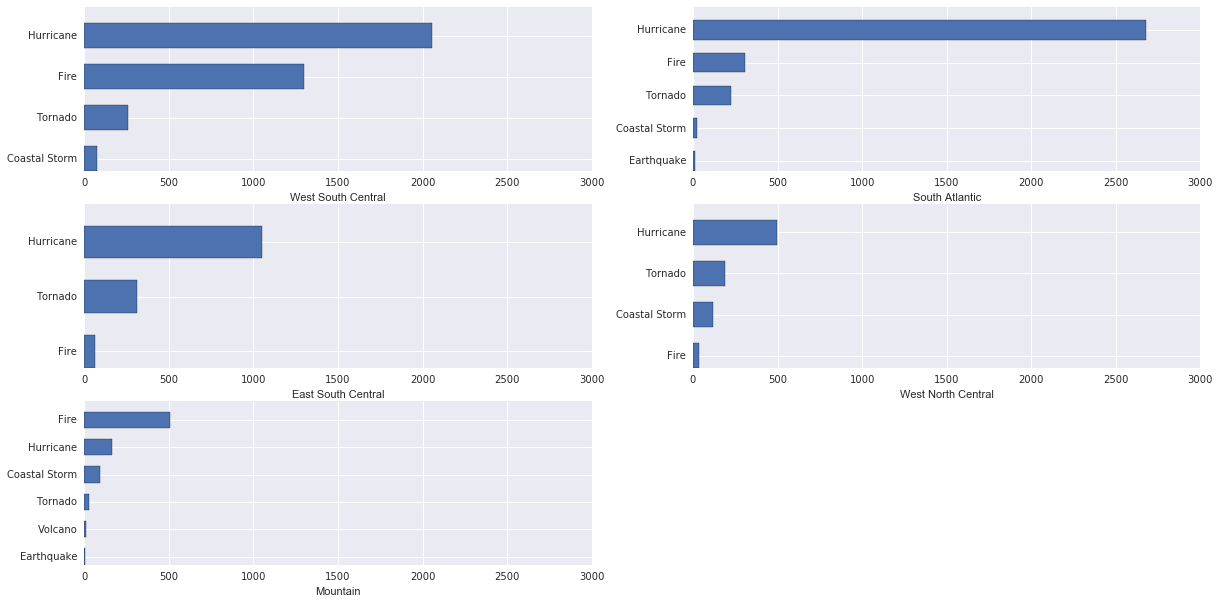

In [223]:
#horizontal barplots
#top 1 division ;West South Central
import seaborn as sns


plt.figure(figsize=(20,10))

plt.title('Top 5 divisions of disasters by disaster type ')

plt.subplot(3, 2, 1)
x=np.arange(len(div1))
y=div1['state']
height = 0.6
plt.barh(x, y, height, left=None)
# add some text for labels, title and axes ticks
plt.xlabel('West South Central')
plt.xticks(range(0,3500,500))
plt.yticks( x + height / 2.,div1.index.values)

plt.subplot(3, 2, 2)
x=np.arange(len(div2))
y=div2['state']
height = 0.6
plt.barh(x, y, height, left=None)
# add some text for labels, title and axes ticks
plt.xlabel('South Atlantic')
plt.xticks(range(0,3500,500))
plt.yticks( x + height / 2.,div2.index.values)

plt.subplot(3, 2, 3)
x=np.arange(len(div3))
y=div3['state']
height = 0.6
plt.barh(x, y, height, left=None)

# add some text for labels, title and axes ticks
plt.xlabel('East South Central')
plt.xticks(range(0,3500,500))
plt.yticks( x + height / 2.,div3.index.values)

plt.subplot(3, 2, 4)
x=np.arange(len(div4))
y=div4['state']
height = 0.6
plt.barh(x, y, height, left=None)
# add some text for labels, title and axes ticks
plt.xlabel('West North Central')
plt.xticks(range(0,3500,500))
plt.yticks( x + height / 2.,div4.index.values)

plt.subplot(3, 2, 5)
x=np.arange(len(div5))
y=div5['state']
height = 0.6
plt.barh(x, y, height, left=None)
# add some text for labels, title and axes ticks
plt.xlabel('Mountain')
plt.xticks(range(0,3500,500))
plt.yticks( x + height / 2.,div5.index.values)

plt.show()

In [266]:
##during what months are disasters declared most?
#disasters.head()


In [254]:
disasters['month']=[disasters['date_started'][i][5:7] for i in xrange(len(disasters))]
disasters['year']=[disasters['date_started'][i][:4] for i in xrange(len(disasters))]
#disasters.head()
month_dic=dict(zip(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
month_df=pd.DataFrame(month_dic.items(),columns=['month','Mon'])

dis_month=pd.merge(disasters,month_df,on='month')


In [355]:
dis_month_p=dis_month.groupby(['year','month']).count()
dis_month_p.sort_values('state',ascending=[False]).head()# top 5 months are: 2005.08,2005.09,2004.09,2012.10,2011.08

date_started  date_ended  declaration_type  disaster_type  \
year month                                                              
2005 08             3025        3025              3025           3025   
     09              863         863               863            863   
2004 09              581         581               581            581   
2012 10              559         559               559            559   
2011 08              490         488               490            490   

            disaster_title  days_lasted  county  county_fip  state  \
year month                                                           
2005 08               3025         3025    3025        3022   3025   
     09                863          863     863         862    863   
2004 09                581          581     581         580    581   
2012 10                559          559     559         557    559   
2011 08                490          488     490         489    490   

            state_abbr  division_name  region_name  latitude  longitude   Mon  
year month                                                                     
2005 08           3025           3025         3025      3025       3025  3025  
     09            863            863          863       863        863   863  
2004 09            581            581          581       581        581   581  
2012 10            559            559          559       559        559   559  
2011 08            490            490          490       490        490   490

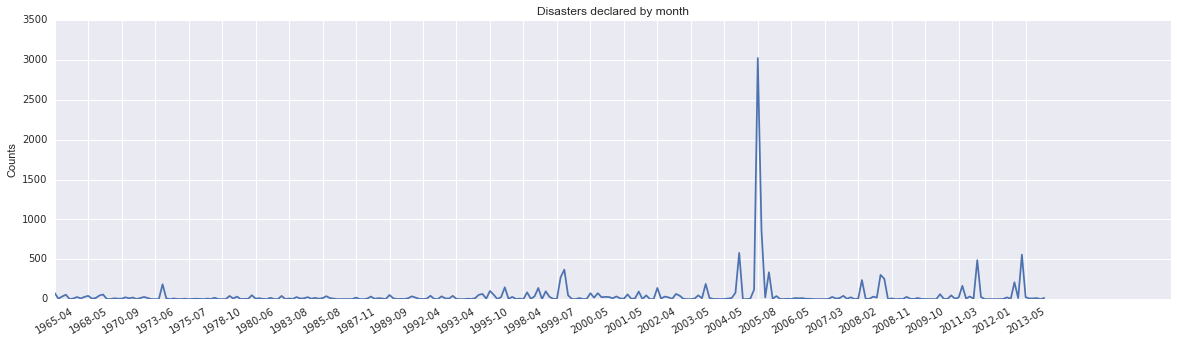

In [308]:
plt.figure(figsize=[20,5])
x=np.arange(len(dis_month_p))
plt.plot(x,dis_month_p['date_started'])
plt.title('Disasters declared by month')
plt.ylabel('Counts')
plt.xticks(np.arange(0,len(dis_month_p),9),[[d[0]+'-'+d[1] for d in dis_month_p.index.values][i] for i in np.arange(0,len(dis_month_p),9)],rotation=30)

plt.show()

In [312]:
dis_month[(dis_month['year']=='2005')&(dis_month['month']=='08')].groupby(['region_name']).count().sort_values('state',ascending=[False])
#top 1 month, 2005-08:
#top 3 regions affected are : south, midwest,west

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,latitude,longitude,month,year,Mon
region_name,,,,,,,,,,,,,,,,
South,1535,1535,1535,1535,1535,1535,1535,1534,1535,1535,1535,1535,1535,1535,1535,1535
Midwest,885,885,885,885,885,885,885,883,885,885,885,885,885,885,885,885
West,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
Northeast,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202


In [313]:
dis_month[(dis_month['year']=='2005')&(dis_month['month']=='09')].groupby(['region_name']).count().sort_values('state',ascending=[False])
#top 1 month, 2005-09:
#top regions affected are : south, midwest,west

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,latitude,longitude,month,year,Mon
region_name,,,,,,,,,,,,,,,,
South,688,688,688,688,688,688,688,687,688,688,688,688,688,688,688,688
Midwest,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
West,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [315]:
dis_month[(dis_month['year']=='2004')&(dis_month['month']=='09')].groupby(['region_name']).count().sort_values('state',ascending=[False])
#top 1 month, 2004-09:
#top regions affected are : south, northeast,west

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,latitude,longitude,month,year,Mon
region_name,,,,,,,,,,,,,,,,
South,508,508,508,508,508,508,508,507,508,508,508,508,508,508,508,508
Northeast,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
West,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [317]:
dis_month[(dis_month['year']=='2012')&(dis_month['month']=='10')].groupby(['region_name']).count().sort_values('state',ascending=[False])
#top 1 month, 2012-10:
#top 3 regions affected are : south, northeast,midwest&west(tied)

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,latitude,longitude,month,year,Mon
region_name,,,,,,,,,,,,,,,,
South,291,291,291,291,291,291,291,290,291,291,291,291,291,291,291,291
Northeast,264,264,264,264,264,264,264,263,264,264,264,264,264,264,264,264
Midwest,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
West,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [319]:
dis_month[(dis_month['year']=='2011')&(dis_month['month']=='08')].groupby(['region_name']).count().sort_values('state',ascending=[False])
#top 1 month, 2011-08:
#top 3 regions affected are : south, northeast,west

,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,latitude,longitude,month,year,Mon
region_name,,,,,,,,,,,,,,,,
South,282,280,282,282,282,280,282,282,282,282,282,282,282,282,282,282
Northeast,207,207,207,207,207,207,207,206,207,207,207,207,207,207,207,207
West,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [348]:
##average disasters and ufos by month 
dis_ave_by_month=dis_month.groupby('month').count()/49. #(1965-2013, years )
dis_ave_by_month



,date_started,date_ended,declaration_type,disaster_type,disaster_title,days_lasted,county,county_fip,state,state_abbr,division_name,region_name,latitude,longitude,year,Mon
month,,,,,,,,,,,,,,,,
01,2.408163,1.673469,2.408163,2.408163,2.408163,1.673469,2.408163,2.408163,2.408163,2.408163,2.408163,2.408163,2.408163,2.408163,2.408163,2.408163
02,3.693878,3.306122,3.693878,3.693878,3.693878,3.306122,3.693878,3.693878,3.693878,3.693878,3.693878,3.693878,3.693878,3.693878,3.693878,3.693878
03,8.102041,8.040816,8.102041,8.102041,8.102041,8.040816,8.102041,8.102041,8.102041,8.102041,8.102041,8.102041,8.102041,8.102041,8.102041,8.102041
04,17.836735,16.367347,17.836735,17.836735,17.836735,16.367347,17.836735,17.775510,17.836735,17.836735,17.836735,17.836735,17.836735,17.836735,17.836735,17.836735
05,10.877551,9.693878,10.877551,10.877551,10.877551,9.693878,10.877551,10.877551,10.877551,10.877551,10.877551,10.877551,10.877551,10.877551,10.877551,10.877551
06,9.040816,8.428571,9.040816,9.040816,9.040816,8.428571,9.040816,8.857143,9.040816,9.040816,9.040816,9.040816,9.040816,9.040816,9.040816,9.040816
07,10.897959,10.632653,10.897959,10.897959,10.897959,10.632653,10.897959,10.693878,10.897959,10.897959,10.897959,10.897959,10.897959,10.897959,10.897959,10.897959
08,97.163265,96.673469,97.163265,97.163265,97.163265,96.673469,97.163265,97.000000,97.163265,97.163265,97.163265,97.163265,97.163265,97.163265,97.163265,97.163265
09,63.224490,62.877551,63.224490,63.224490,63.224490,62.877551,63.224490,63.081633,63.224490,63.224490,63.224490,63.224490,63.224490,63.224490,63.224490,63.224490


In [373]:
ufos = pd.read_csv('ufos_complete.csv',header =0,dtype=object)
#
ufos=ufos.iloc[0:67346]  #remove records of 2014
ufos.head()

,date_seen,date_posted,shape,duration_min,comments,city_raw,city,county,county_fip,zip_code,state,state_abbr,division_name,region_name,latitude,longitude
0,1/1/65 17:00,11/21/10,light,0.333333333,Light over Mokena Illinios,Mokena,Mokena,Will County,IL-197,60448,Illinois,IL,East North Central,Midwest,41.5261111,-87.8891667
1,1/1/65 20:00,2/1/07,fireball,0.333333333,winter nite wonder,St. Ansgar,Saint Ansgar,Mitchell County,IA-131,50472,Iowa,IA,West North Central,Midwest,43.3783333,-92.9186111
2,1/1/65 20:00,6/2/98,light,60,At a drive-in during the summer my brother and...,Conway,Conway,Faulkner County,AR-045,72034,Arkansas,AR,West South Central,South,35.0886111,-92.4419444
3,2/2/65 6:00,7/16/03,sphere,120,Huge&#44 bright orb in sky over Seattle in 1960s.,Seattle/Belfair,Bellevue,King County,WA-033,98004,Washington,WA,Pacific,West,47.619239,-122.207923
4,2/15/65 17:00,8/4/03,oval,65,Object hovered over electric transformer for a...,Chicago,Chicago,Cook County,IL-031,60608,Illinois,IL,East North Central,Midwest,41.85,-87.65


In [417]:
ufos['month']=[ufos['date_seen'][i].split('/')[0] for i in xrange(len(ufos))]

In [425]:
for i in xrange(len(ufos)):
    if len(ufos['month'][i])==1 :
        ufos['month'][i]='0'+ufos['month'][i]
ufos['month'] 

ufo_ave_by_month=ufos.groupby('month').count().sort_index(axis=0,ascending=True)/49.
ufo_ave_by_month

,date_seen,date_posted,shape,duration_min,comments,city_raw,city,county,county_fip,zip_code,state,state_abbr,division_name,region_name,latitude,longitude
month,,,,,,,,,,,,,,,,
01,88.040816,88.040816,88.040816,88.040816,87.979592,88.040816,88.040816,87.897959,87.714286,87.836735,88.040816,88.040816,88.040816,88.040816,88.040816,88.040816
02,73.979592,73.979592,73.979592,73.979592,73.959184,73.979592,73.979592,73.775510,73.591837,73.775510,73.979592,73.979592,73.979592,73.979592,73.979592,73.979592
03,88.653061,88.653061,88.653061,88.653061,88.632653,88.653061,88.653061,88.489796,88.204082,88.469388,88.653061,88.653061,88.653061,88.653061,88.653061,88.653061
04,86.571429,86.571429,86.571429,86.571429,86.571429,86.571429,86.571429,86.163265,85.734694,86.163265,86.571429,86.571429,86.571429,86.571429,86.571429,86.571429
05,89.693878,89.693878,89.693878,89.693878,89.673469,89.693878,89.693878,89.285714,88.877551,89.265306,89.693878,89.693878,89.693878,89.693878,89.693878,89.693878
06,136.938776,136.938776,136.938776,136.938776,136.897959,136.938776,136.938776,136.224490,135.714286,136.204082,136.938776,136.938776,136.938776,136.938776,136.938776,136.938776
07,166.489796,166.489796,166.489796,166.489796,166.428571,166.489796,166.489796,165.795918,165.020408,165.734694,166.489796,166.489796,166.489796,166.489796,166.489796,166.489796
08,148.877551,148.877551,148.877551,148.877551,148.877551,148.877551,148.877551,148.122449,147.653061,148.081633,148.877551,148.877551,148.877551,148.877551,148.877551,148.877551
09,135.163265,135.163265,135.163265,135.163265,135.163265,135.163265,135.163265,134.489796,134.081633,134.102041,135.163265,135.163265,135.163265,135.163265,135.163265,135.163265


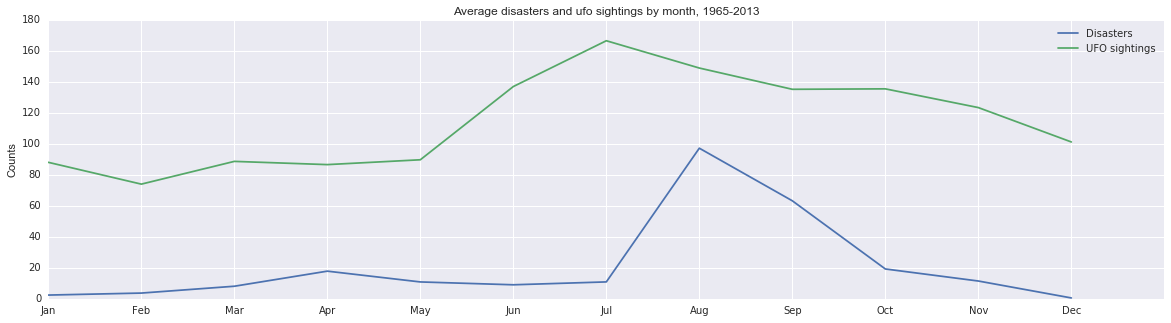

In [428]:
plt.figure(figsize=[20,5])

x=np.arange(12)
plt.plot(x,dis_ave_by_month['date_started'])
plt.plot(x,ufo_ave_by_month['date_seen'])
plt.title('Average disasters and ufo sightings by month, 1965-2013')
plt.ylabel('Counts')
plt.xticks(np.arange(12),[month_dic[m] for m in dis_ave_by_month.index.values])
plt.legend(['Disasters','UFO sightings'])
plt.show()

There could be a correlation between the averaged counts of disasters and ufo sightings by month .

In [449]:
#first normalize them,
raw1=dis_ave_by_month['date_started']
a1 = raw1.mean()
s1=raw1.std()
print a1,s1
norm1 = [(float(i)-a1)/s1 for i in raw1]
norm1

21.2091836735 29.0209302028


[-0.6478434797492967,
 -0.6035404792345551,
 -0.45164447746972675,
 -0.11620747357239748,
 -0.3560062541363163,
 -0.41929625487166144,
 -0.3553030319059236,
 2.6172173359641198,
 1.4477587668210197,
 -0.06768513967529957,
 -0.33561280945492733,
 -0.7118367027150345]

In [450]:
raw2=ufo_ave_by_month['date_seen']
a2 = raw2.mean()
s2 = raw2.std()
norm2 = [(float(i)-a2)/s2 for i in raw2]
#norm2 = [float(i)/max(raw2) for i in raw2]
norm2

[-0.8824192133519312,
 -1.3507618796758347,
 -0.8620269347021244,
 -0.9313606821114685,
 -0.8273600609974522,
 0.7462441081459981,
 1.7305114243100215,
 1.1438935418172365,
 0.6871065000615567,
 0.6966228967648006,
 0.29421526474193976,
 -0.4446649650027384]

In [452]:
np.corrcoef(norm1,norm2)[0,1] # correlation coefficient is 49.186%

0.4918617911879607

In [453]:
from scipy.stats.stats import pearsonr


In [454]:
pearsonr(norm1,norm2) # 2-tailed p value is 0.1043

(0.49186179118796064, 0.10432973729887805)